### Running on Python 3.X

In [1]:
from website_load_module.readTrafficSigns import readTrafficSigns
import numpy as np

# from cs231n
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
with open('dataset_path.txt', mode='r') as file:
    absolute_path = next(file)

In [3]:
X_train, y_train = readTrafficSigns(absolute_path)
X_train, y_train = np.array(X_train), np.array(y_train).astype(int)

In [4]:
X_train.shape, y_train.shape

((39209,), (39209,))

#### Plot a random image of each traffic sign class

In [5]:
num_classes = len(np.unique(y_train))
num_classes

43

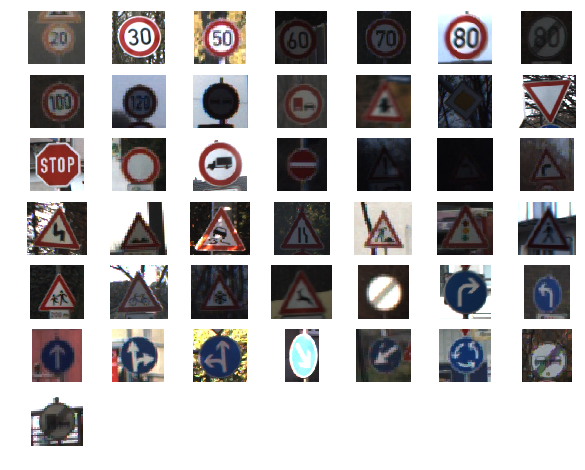

In [6]:
for i in range(num_classes):
    plt.subplot(7, 7, i+1)
    plt.axis('off')
    pics_of_class = X_train[y_train == i]
    pic = np.random.choice(pics_of_class, 1)[0] # unwraps the returned list
    plt.imshow(pic.astype('uint8'))
plt.show()

Remember that the dataset includes 30 images of each real-life traffic sign from approaching perspectives. 
Each of the 30 pictures has also a different size in pixels, notice thats why the quality increases as we approach the latest images.

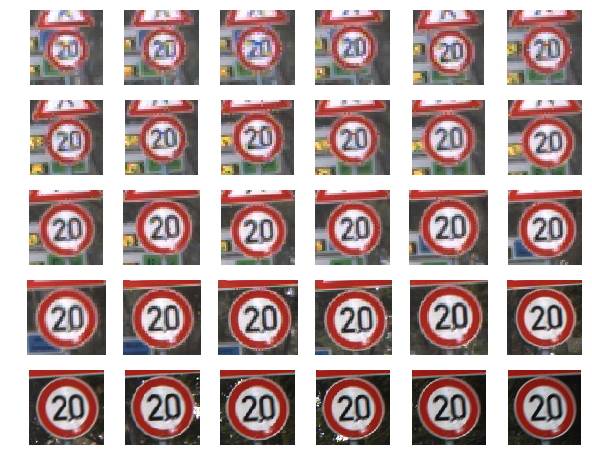

In [7]:
for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.axis('off')
    plt.imshow(X_train[i].astype('uint8'))
plt.show()

We will resize all pictures to an appropiate uniform size to feed them to the CNN. Lets inspect the current size of our images. 

In [8]:
import pandas as pd
df = pd.read_csv('generated_concat_csv.csv', sep=';')
df[:4]

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000_00000.ppm,29,30,5,6,24,25,0
1,00000_00001.ppm,30,30,5,5,25,25,0
2,00000_00002.ppm,30,30,5,5,25,25,0
3,00000_00003.ppm,31,31,5,5,26,26,0


(20, 70)

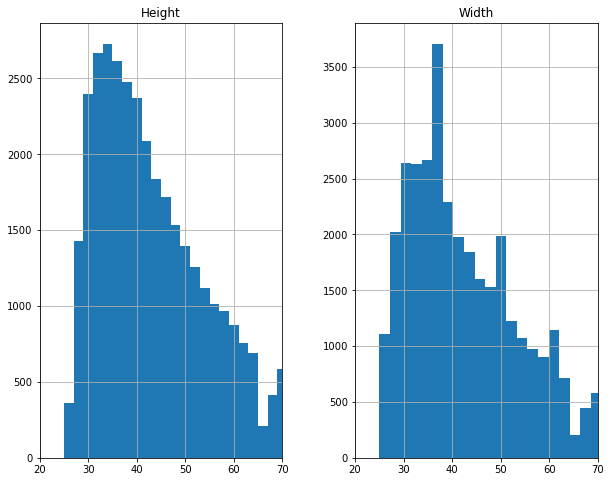

In [9]:
ax_list = df[['Width', 'Height']].hist(bins=100)
ax_list[0][0].set_xlim(20, 70) # zoom in
ax_list[0][1].set_xlim(20, 70)

By resizing to 32x32 we would lie about in the middle of the size spectrum and keep a size like $2^n$. Which seems to be beneficial computationally
### resizing / rescaling with scikit
http://scikit-image.org/docs/dev/auto_examples/transform/plot_rescale.html

### Plot a histogram of over the images in each class

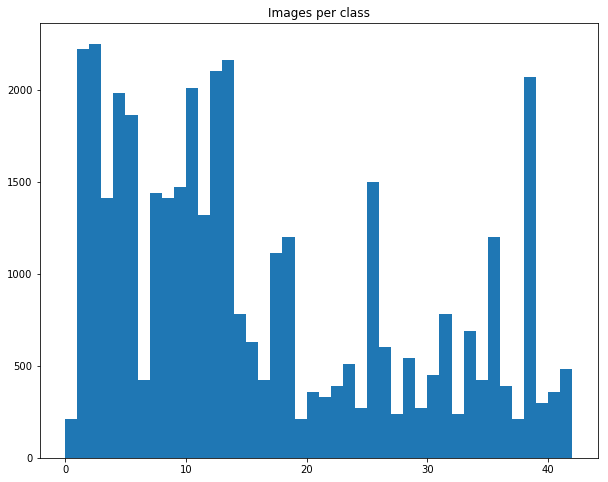

In [10]:
plt.hist(y_train, bins=range(43))
plt.title('Images per class')
plt.show()

As we see, some traffic sign are heavily overrepresented compared to others.